In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#### Se realiza la carga de los datos procesados.

In [2]:
filtro_normal_PT = pd.read_csv('Datasets\filtro_normal_PT.csv')
top_geneScore = pd.read_csv('Datasets\top_geneScore.csv')
top_genes = pd.read_csv('Datasets\top_genes.csv')

In [3]:
filtro_normal_PT.head()

,sample_type,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284024,ENSG00000284976,ENSG00000285410,ENSG00000285756,ENSG00000285967,ENSG00000286208,ENSG00000286379,ENSG00000286388,ENSG00000286451,ENSG00000288066
0,Solid Tissue Normal,4209,1611,1217,346,787,5013,1691,2067,2148,...,940,681,1050,568,746,332,341,278,718,605
1,Solid Tissue Normal,2761,1178,611,165,651,5745,1205,2415,1170,...,641,304,704,317,726,6,266,317,216,570
2,Solid Tissue Normal,6679,2240,1980,458,442,1982,1577,2296,2405,...,1305,848,1454,1034,763,169,198,317,859,867
3,Solid Tissue Normal,3541,1353,947,259,936,7470,2097,2511,1840,...,884,645,1018,422,1104,15,377,378,237,600
4,Solid Tissue Normal,2746,1047,335,81,692,4576,1726,1768,729,...,420,336,713,58,534,0,6,132,2,660


In [4]:
top_genes.head()

,HGNC.symbol,Count,Ensembl.ID
0,TP53,279.0,ENSG00000141510
1,EP300,250.0,ENSG00000100393
2,CREBBP,248.0,ENSG00000005339
3,YWHAG,237.0,ENSG00000170027
4,SMAD3,210.0,ENSG00000166949


In [5]:
top_geneScore.head()

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787


#### Comenzamos con la creación del modelo de clasificación Random Forest utilizando los 100 genes como predictores obtenidos de la 'RED_PPI'.

In [6]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_genes = top_genes['Ensembl.ID']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_genes.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo con ajuste de pesos de clase
clf_balanced = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=42)

In [7]:
# Entrenar el modelo
clf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42)

In [8]:
# Realizar predidciones en el conjunto de prueba
y_pred_balanced = clf_balanced.predict(X_test)

In [9]:
# Evaluar el rendimiento del modelo
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

# Mostrar los resultados
print(f'Accuracy con Ajuste de Pesos de Clase: {accuracy_balanced}')
print('Classification Report con Ajuste de Pesos de Clase:\n', classification_rep_balanced)

Accuracy con Ajuste de Pesos de Clase: 0.9795081967213115
Classification Report con Ajuste de Pesos de Clase:
                      precision    recall  f1-score   support

      Primary Tumor       0.98      1.00      0.99       222
Solid Tissue Normal       0.95      0.82      0.88        22

           accuracy                           0.98       244
          macro avg       0.96      0.91      0.93       244
       weighted avg       0.98      0.98      0.98       244



Capacidad de Generalización: La precisión del 98% en el conjunto de datos de prueba es un indicador positivo de la capacidad de generalización del modelo.

Sesgo de Clase: Se observan más instancias de la clase 'Primary Tumor' que de la clase 'Solid Tissue Normal' (222 frente a 22), lo que sugiere un desequilibrio en el conjunto de datos. A pesar de esto, el modelo muestra un buen rendimiento para ambas clases, indicando una gestión eficaz del desequilibrio de clases.

Sensibilidad a 'Solid Tissue Normal': La precisión para la clase 'Solid Tissue Normal' es del 95%, mientras que el recall es del 82%. Esto podría indicar que el modelo podría estar perdiendo algunos casos de 'Solid Tissue Normal', pero a pesar de la menor precisión, muestra un rendimiento sólido.

Ajuste de Pesos de Clase: La aplicación de ajuste de pesos de clase ha mejorado el rendimiento general, especialmente para la clase minoritaria ('Solid Tissue Normal').

Macro y Weighted Avg: Las métricas macro avg (promedio no ponderado de las métricas por clase) muestran un 96% para precisión, 91% para recall y 93% para f1-score. En cuanto a weighted avg (promedio ponderado según el soporte de cada clase), se observan valores del 98% para precisión, 98% para recall y 98% para f1-score. Ambas indican un rendimiento alto y equilibrado del modelo.

En conclusión, estos resultados respaldan la solidez del modelo.

#### Se crea un segundo modelo de clasificación Random Forest utilizando los 100 genes como predictores obtenidos de 'geneScore' (PIK3R1).

In [12]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_geneScore = top_geneScore['features']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_geneScore.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo con ajuste de pesos de clase
clf_balanced = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, class_weight='balanced', random_state=42)

In [13]:
# Entrenar el modelo
clf_balanced.fit(X_train1, y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42)

In [14]:
# Realizar predidciones en el conjunto de prueba
y_pred_balanced1 = clf_balanced.predict(X_test1)

In [15]:
# Evaluar el rendimiento del modelo
accuracy_balanced = accuracy_score(y_test1, y_pred_balanced1)
classification_rep_balanced = classification_report(y_test, y_pred_balanced)

# Mostrar los resultados
print(f'Accuracy con Ajuste de Pesos de Clase: {accuracy_balanced}')
print('Classification Report con Ajuste de Pesos de Clase:\n', classification_rep_balanced)

Accuracy con Ajuste de Pesos de Clase: 0.9795081967213115
Classification Report con Ajuste de Pesos de Clase:
                      precision    recall  f1-score   support

      Primary Tumor       0.98      1.00      0.99       222
Solid Tissue Normal       0.95      0.82      0.88        22

           accuracy                           0.98       244
          macro avg       0.96      0.91      0.93       244
       weighted avg       0.98      0.98      0.98       244



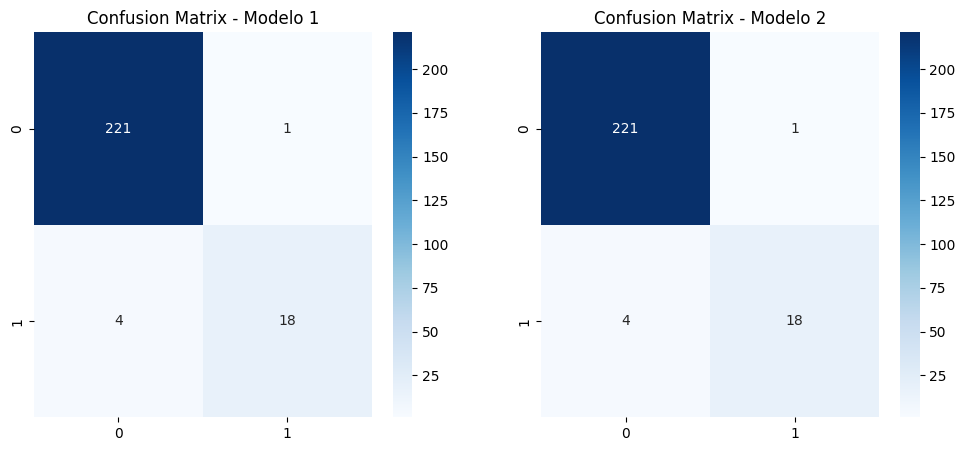

In [16]:
# Matriz de confusión para el primer modelo
cm1 = confusion_matrix(y_test, y_pred_balanced)  # Asegúrate de reemplazar y_true y y_pred1 con tus datos reales y predichos

# Matriz de confusión para el segundo modelo
cm2 = confusion_matrix(y_test1, y_pred_balanced1)  # Asegúrate de reemplazar y_true y y_pred2 con tus datos reales y predichos

# Crear subplots para comparar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión para el primer modelo
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Modelo 1')

# Matriz de confusión para el segundo modelo
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Modelo 2')

plt.show()

Se llevó a cabo el entrenamiento de un segundo modelo utilizando como predictores los 100 genes con mayor puntaje obtenidos de 'geneScore', los cuales fueron identificados a través del gen 'PIK3R1'. Se observa que el rendimiento no experimentó variaciones en sus resultados, lo que sugiere que el cambio en los genes predictores no afecta la eficacia del modelo, que mantiene un rendimiento alto.